<a href="https://colab.research.google.com/github/IJSK10/Analyzing-Classification-and-Feature-Selection-Strategies-for-Diabetes-Prediction/blob/main/Dataset4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lime

In [ ]:
pip install shap

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
string_to_int= preprocessing.LabelEncoder()
import matplotlib.pyplot as pyplot

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from lime.lime_tabular import LimeTabularExplainer

import shap

In [ ]:
data = pd.read_csv("/content/Dataset-4-Healthcare-Diabetes- numerical input.csv")


In [ ]:
#pre processing
X1 = data.drop(columns=['Outcome'])
M=data['Outcome']
print(X1)
data=data.apply(string_to_int.fit_transform)
print(data)
X = data.drop(columns=['Outcome'])
y = data['Outcome']


      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0               6       86             22             28        0  123   
1               1       23             19             22        0   62   
2               8      121             17              0        0   30   
3               1       27             19             16       62   77   
4               0       75              4             28      102  209   
...           ...      ...            ...            ...      ...  ...   
2763            2       13             17             17       27   91   
2764            8      117             22             35       83  116   
2765            6       23             26              0        0  105   
2766            0       67             44             39       83  251   
2767            2       19             22              8       46   95   

      DiabetesPedigreeFunction  Age  
0                          354   29  
1                          199   10

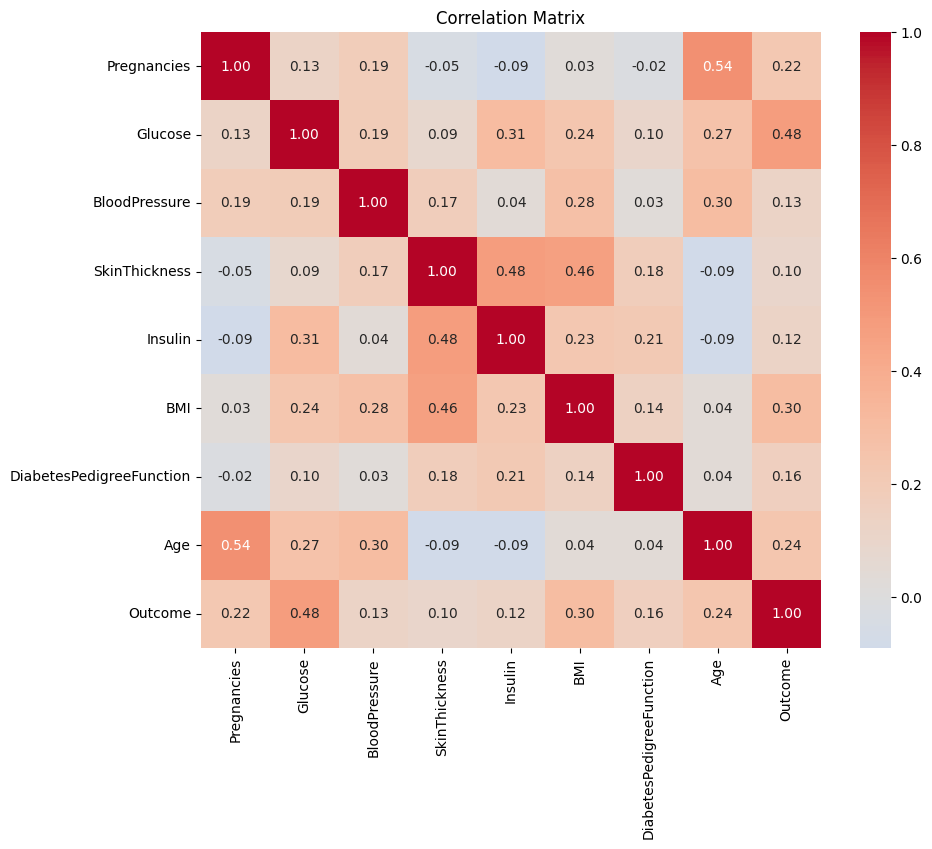

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

                    Feature  Importance
1                   Glucose    0.264409
5                       BMI    0.168129
7                       Age    0.135859
6  DiabetesPedigreeFunction    0.123766
2             BloodPressure    0.088714
0               Pregnancies    0.082029
4                   Insulin    0.071082
3             SkinThickness    0.066012


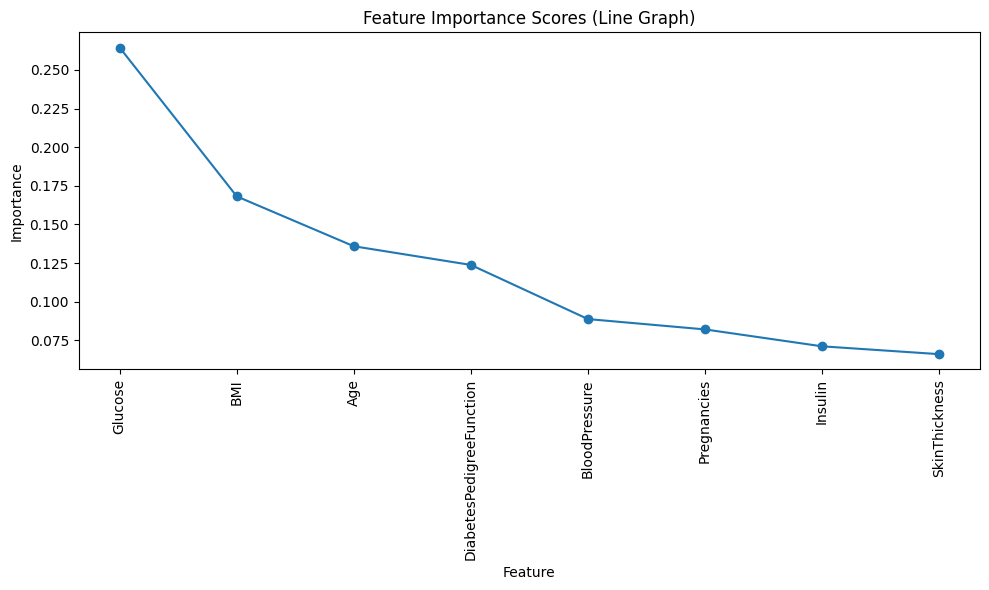

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
feature_importances1 = clf.feature_importances_
feature_importance_df1 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances1})
feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)
print(feature_importance_df1)
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df1['Feature'], feature_importance_df1['Importance'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores (Line Graph)')
plt.tight_layout()
plt.show()

                    Feature  Importance
1                   Glucose    0.242324
5                       BMI    0.152644
7                       Age    0.143145
6  DiabetesPedigreeFunction    0.096320
3             SkinThickness    0.095926
0               Pregnancies    0.094238
4                   Insulin    0.094123
2             BloodPressure    0.081279


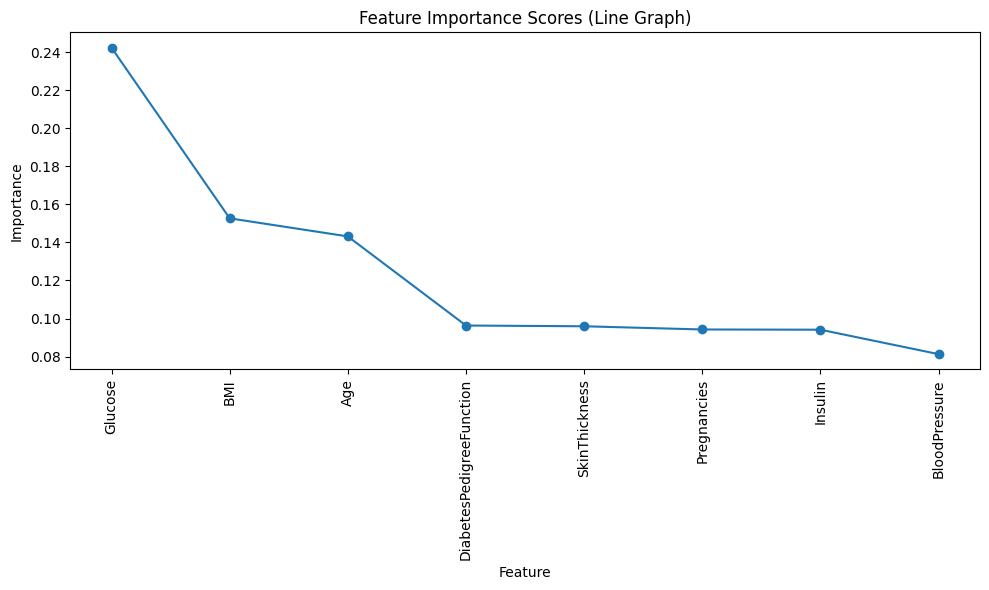

In [ ]:
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
feature_importances2 = model.feature_importances_
feature_importance_df2 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances2})
feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=False)
print(feature_importance_df2)
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df2['Feature'], feature_importance_df2['Importance'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores (Line Graph)')
plt.tight_layout()
plt.show()


                    Feature  Importance
1                   Glucose    0.409100
5                       BMI    0.194234
7                       Age    0.148271
6  DiabetesPedigreeFunction    0.104825
4                   Insulin    0.060331
0               Pregnancies    0.042539
2             BloodPressure    0.024812
3             SkinThickness    0.015889


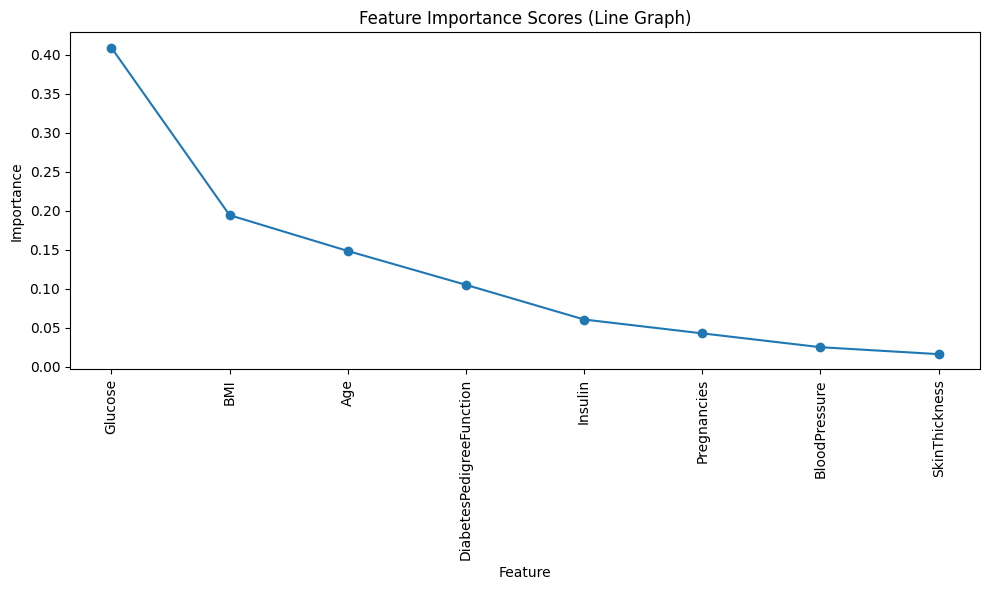

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
feature_importances3 = model.feature_importances_
feature_importance_df3 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances3})
feature_importance_df3 = feature_importance_df3.sort_values(by='Importance', ascending=False)
print(feature_importance_df3)
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df3['Feature'], feature_importance_df3['Importance'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores (Line Graph)')
plt.tight_layout()
plt.show()

Glucose : 0.1251
BMI : 0.0365
DiabetesPedigreeFunction : 0.0228
Pregnancies : 0.0067
SkinThickness : 0.0019
BloodPressure : 0.0014
Insulin : 0.0009
Age : 0.0003


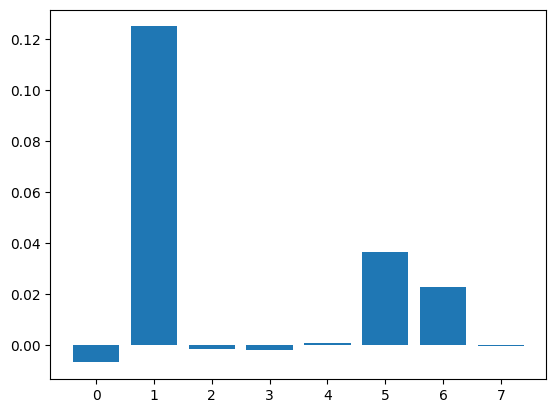

In [ ]:
model = SVC()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
l1=[]
# summarize feature importance
for i,v in enumerate(importance):
    l1=l1+[abs(v)]
zipped=zip(X.columns,l1)
zipped = list(zipped)

# Printing zipped list

# Using sorted and lambda
res = sorted(zipped, key = lambda x: x[1],reverse=True)

for feature, importances in res:
  print(f"{feature} : {importances:.4f}")

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
model = LinearRegression()

# Train the Linear Regression model on the training data
model.fit(X, y)

# Get the feature importances (coefficients)
feature_importances = model.coef_
feature_importances4 = model.coef_


zipped=zip(X.columns,abs(feature_importances))
zipped = list(zipped)

# Printing zipped list

# Using sorted and lambda
res = sorted(zipped, key = lambda x: x[1],reverse=True)

for feature, importance in res:
  print(f"{feature} : {importance:.4f}")

Pregnancies : 0.0209
Glucose : 0.0065
BloodPressure : 0.0029
Age : 0.0019
BMI : 0.0017
Insulin : 0.0006
DiabetesPedigreeFunction : 0.0004
SkinThickness : 0.0001


In [ ]:
model = LinearRegression()

# Train the Linear Regression model on the training data
model.fit(X, y)

# Get the feature importances (coefficients)
feature_importances = model.coef_


zipped=zip(X.columns,abs(feature_importances))
zipped = list(zipped)

# Printing zipped list

# Using sorted and lambda
res = sorted(zipped, key = lambda x: x[1],reverse=True)

for feature, importance in res:
  print(f"{feature} : {importance:.4f}")

Pregnancies : 0.0209
Glucose : 0.0065
BloodPressure : 0.0029
Age : 0.0019
BMI : 0.0017
Insulin : 0.0006
DiabetesPedigreeFunction : 0.0004
SkinThickness : 0.0001


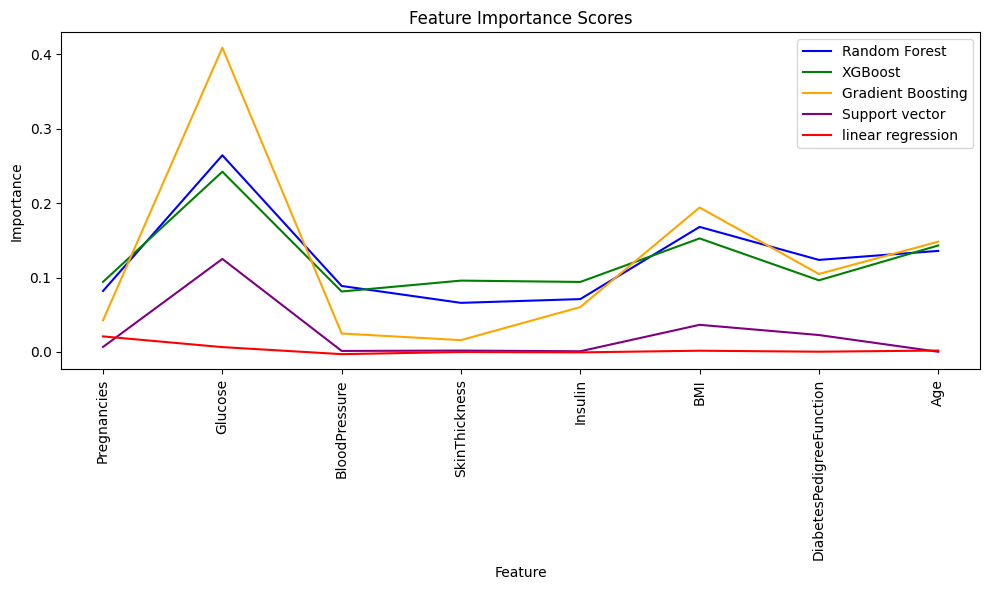

In [ ]:
plt.figure(figsize=(10, 6))

# Plot Random Forest scores in blue
plt.plot(X.columns, feature_importances1, color='blue', label='Random Forest')

# Plot XGBoost scores in green
plt.plot(X.columns, feature_importances2, color='green', label='XGBoost')

# Plot Gradient Boosting scores in orange
plt.plot(X.columns, feature_importances3, color='orange', label='Gradient Boosting')

plt.plot(X.columns, l1, color='purple', label='Support vector')

plt.plot(X.columns, feature_importances, color='red', label='linear regression')

plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
#chisquare
k = 7
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)

print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [0 1 3 4 5 6 7]
Pregnancies
Glucose
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


In [ ]:
#fischer's score
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [0 1 2 4 5 6 7]
Pregnancies
Glucose
BloodPressure
Insulin
BMI
DiabetesPedigreeFunction
Age


In [ ]:
#missing value
missing_threshold = 0.5
data1 = data[data.columns[data.isnull().mean() < missing_threshold]]
x = data.drop(columns=['Outcome'])
data=data.apply(string_to_int.fit_transform)
q = data['Outcome']
k =7
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(x, q)

# Get the indices of selected features
selected_indices = selector.get_support(indices=True)

# Print the indices of selected features
print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [0 1 2 4 5 6 7]
Pregnancies
Glucose
BloodPressure
Insulin
BMI
DiabetesPedigreeFunction
Age


In [ ]:
#information gain
def information_gain(X, y):
    def entropy(labels):
        unique_labels, counts = np.unique(labels, return_counts=True)
        probabilities = counts / np.sum(counts)
        return -np.sum(probabilities * np.log2(probabilities))

    def conditional_entropy(feature, labels):
        unique_feature_vals = np.unique(feature)
        conditional_entropies = []
        for value in unique_feature_vals:
            subset_labels = labels[feature == value]
            conditional_entropies.append(
                len(subset_labels) / len(labels) * entropy(subset_labels)
            )
        return np.sum(conditional_entropies)

    original_entropy = entropy(y)
    information_gains = []
    for feature_column in X.T:
        info_gain = original_entropy - conditional_entropy(feature_column, y)
        information_gains.append(info_gain)
    return information_gains

info_gains = information_gain(X.values, y.values)
sorted_indices = np.argsort(info_gains)[::-1]
k = 7
selected_indices = sorted_indices[:k]
X_new = X.iloc[:, selected_indices]
print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [6 5 1 4 7 3 0]
DiabetesPedigreeFunction
BMI
Glucose
Insulin
Age
SkinThickness
Pregnancies


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred,average='weighted')
recall1 = recall_score(y_test, y_pred,average='weighted')

true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
f11 = f1_score(y_test, y_pred)
print("F1-score:", f11)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9819494584837545
Precision: 0.9819673247791
Recall: 0.9819494584837545
F1-score: 0.9729729729729729
True Positives: 180
False Positives: 3
Confusion Matrix:
 [[364   3]
 [  7 180]]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred,average='weighted')
recall2 = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)

f12 = f1_score(y_test, y_pred)
print("F1-score:", f12)

Accuracy: 0.9819494584837545
Precision: 0.9819673247791
Recall: 0.9819494584837545
True Positives: 180
False Positives: 3
Confusion Matrix:
 [[364   3]
 [  7 180]]
F1-score: 0.9729729729729729


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred,average='weighted')
recall3 = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)

f13 = f1_score(y_test, y_pred)
print("F1-score:", f13)

Accuracy: 0.8808664259927798
Precision: 0.8800633547712515
Recall: 0.8808664259927798
True Positives: 143
False Positives: 22
Confusion Matrix:
 [[345  22]
 [ 44 143]]
F1-score: 0.8125


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVR(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy4 = accuracy_score(y_test, y_pred)
precision4 = precision_score(y_test, y_pred,average='weighted')
recall4 = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy4)
print("Precision:", precision4)
print("Recall:", recall4)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f14 = f1_score(y_test, y_pred)
print("F1-score:", f14)

Accuracy: 0.779783393501805
Precision: 0.7746806217836344
Recall: 0.779783393501805
True Positives: 101
False Positives: 36
Confusion Matrix:
 [[331  36]
 [ 86 101]]
F1-score: 0.6234567901234569


<Figure size 4000x20000 with 0 Axes>

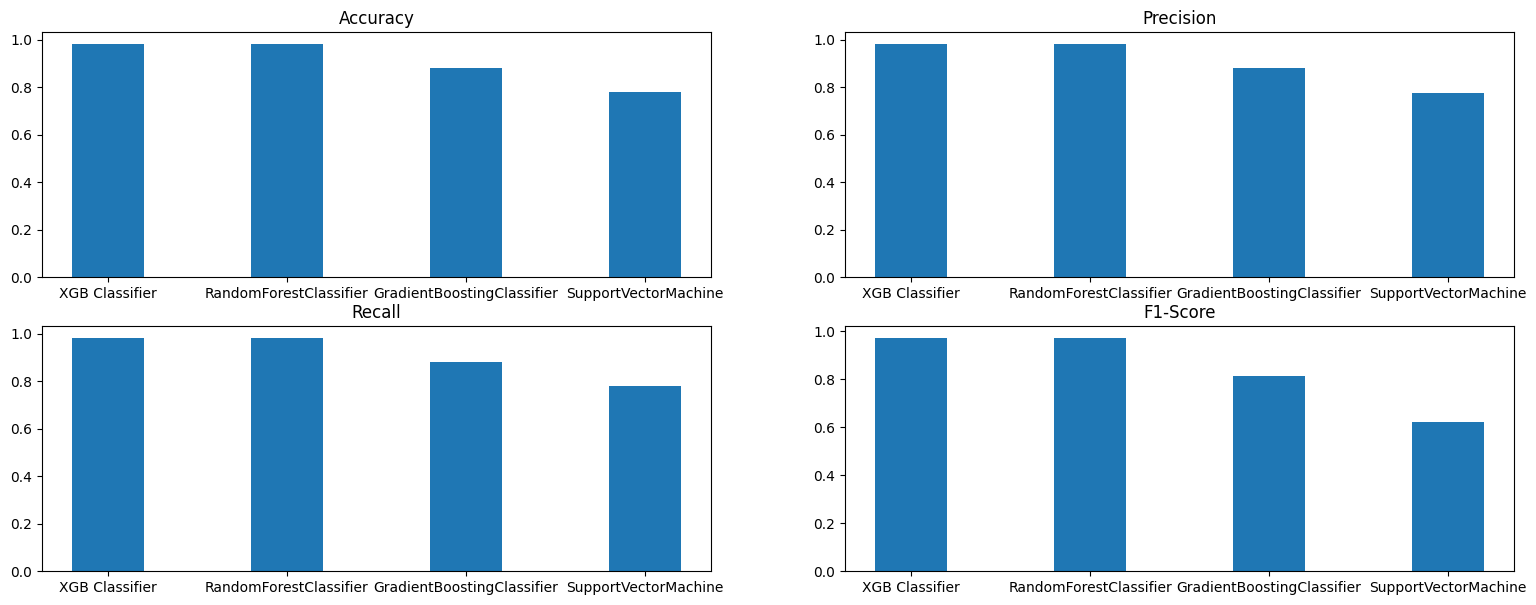

In [ ]:
plt.figure(figsize=(40, 200))
figure, axis = plt.subplots(2, 2, figsize=(19, 7))
X=["XGB Classifier","RandomForestClassifier","GradientBoostingClassifier","SupportVectorMachine"]
Y1=[accuracy1,accuracy2,accuracy3,accuracy4]
Y2=[precision1,precision2,precision3,precision4]
Y3=[recall1,recall2,recall3,recall4]
Y4=[f11,f12,f13,f14]
# For Sine Function
axis[0, 0].bar(X, Y1,width = 0.4)
axis[0, 0].set_title("Accuracy")

# For Cosine Function
axis[0, 1].bar(X, Y2,width = 0.4)
axis[0, 1].set_title("Precision")

# For Tangent Function
axis[1, 0].bar(X, Y3,width = 0.4)
axis[1, 0].set_title("Recall")

# For Tanh Function
axis[1, 1].bar(X, Y4,width = 0.4)
axis[1, 1].set_title("F1-Score")
# Combine all the operations and display
plt.show()

In [ ]:
#random forest
X1 = X[["Glucose","BMI","Age","DiabetesPedigreeFunction","BloodPressure"]]
y = data['Outcome']
print(X1)
print(y)

      Glucose  BMI  Age  DiabetesPedigreeFunction  BloodPressure
0          86  123   29                       354             22
1          23   62   10                       199             19
2         121   30   11                       372             17
3          27   77    0                        54             19
4          75  209   12                       520              4
...       ...  ...  ...                       ...            ...
2763       13   91   12                       210             17
2764      117  116   15                       395             22
2765       23  105   21                       218             26
2766       67  251    5                       173             44
2767       19   95    4                       315             22

[2768 rows x 5 columns]
0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9819494584837545
Precision: 0.9819673247791
Recall: 0.9819494584837545
True Positives: 180
False Positives: 3
Confusion Matrix:
 [[364   3]
 [  7 180]]
F1-score: 0.9729729729729729


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9819494584837545
Precision: 0.9819673247791
Recall: 0.9819494584837545
True Positives: 180
False Positives: 3
Confusion Matrix:
 [[364   3]
 [  7 180]]
F1-score: 0.9729729729729729


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8736462093862816
Precision: 0.8725659610405279
Recall: 0.8736462093862816
True Positives: 141
False Positives: 24
Confusion Matrix:
 [[343  24]
 [ 46 141]]
F1-score: 0.8011363636363636


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.7689530685920578
Precision: 0.7622999749357446
Recall: 0.7689530685920578
True Positives: 100
False Positives: 41
Confusion Matrix:
 [[326  41]
 [ 87 100]]
F1-score: 0.6097560975609756


In [ ]:
#XGBClassifier
X1 = X[["Glucose","BMI","Age","DiabetesPedigreeFunction","SkinThickness"]]
y = data['Outcome']
print(X1)
print(y)

      Glucose  BMI  Age  DiabetesPedigreeFunction  SkinThickness
0          86  123   29                       354             28
1          23   62   10                       199             22
2         121   30   11                       372              0
3          27   77    0                        54             16
4          75  209   12                       520             28
...       ...  ...  ...                       ...            ...
2763       13   91   12                       210             17
2764      117  116   15                       395             35
2765       23  105   21                       218              0
2766       67  251    5                       173             39
2767       19   95    4                       315              8

[2768 rows x 5 columns]
0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.98014440433213
Precision: 0.9801291324286143
Recall: 0.98014440433213
True Positives: 180
False Positives: 4
Confusion Matrix:
 [[363   4]
 [  7 180]]
F1-score: 0.9703504043126684


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.98014440433213
Precision: 0.9801291324286143
Recall: 0.98014440433213
True Positives: 180
False Positives: 4
Confusion Matrix:
 [[363   4]
 [  7 180]]
F1-score: 0.9703504043126684


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8646209386281588
Precision: 0.8630621991576415
Recall: 0.8646209386281588
True Positives: 141
False Positives: 29
Confusion Matrix:
 [[338  29]
 [ 46 141]]
F1-score: 0.7899159663865547


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.7725631768953068
Precision: 0.7661670900453778
Recall: 0.7725631768953068
True Positives: 104
False Positives: 43
Confusion Matrix:
 [[324  43]
 [ 83 104]]
F1-score: 0.6227544910179641


In [ ]:
#Gradient Boosting
X1 = X[["Glucose","BMI","Age","DiabetesPedigreeFunction","BloodPressure"]]
y = data['Outcome']
print(X1)
print(y)

      Glucose  BMI  Age  DiabetesPedigreeFunction  BloodPressure
0          86  123   29                       354             22
1          23   62   10                       199             19
2         121   30   11                       372             17
3          27   77    0                        54             19
4          75  209   12                       520              4
...       ...  ...  ...                       ...            ...
2763       13   91   12                       210             17
2764      117  116   15                       395             22
2765       23  105   21                       218             26
2766       67  251    5                       173             44
2767       19   95    4                       315             22

[2768 rows x 5 columns]
0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9819494584837545
Precision: 0.9819673247791
Recall: 0.9819494584837545
True Positives: 180
False Positives: 3
Confusion Matrix:
 [[364   3]
 [  7 180]]
F1-score: 0.9729729729729729


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9819494584837545
Precision: 0.9819673247791
Recall: 0.9819494584837545
True Positives: 180
False Positives: 3
Confusion Matrix:
 [[364   3]
 [  7 180]]
F1-score: 0.9729729729729729


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8736462093862816
Precision: 0.8725659610405279
Recall: 0.8736462093862816
True Positives: 141
False Positives: 24
Confusion Matrix:
 [[343  24]
 [ 46 141]]
F1-score: 0.8011363636363636


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.7689530685920578
Precision: 0.7622999749357446
Recall: 0.7689530685920578
True Positives: 100
False Positives: 41
Confusion Matrix:
 [[326  41]
 [ 87 100]]
F1-score: 0.6097560975609756


In [ ]:
#SVM
X1 = X[["Glucose","BMI","Age","DiabetesPedigreeFunction","BloodPressure"]]
y = data['Outcome']
print(X1)
print(y)

      Glucose  BMI  Age  DiabetesPedigreeFunction  BloodPressure
0          86  123   29                       354             22
1          23   62   10                       199             19
2         121   30   11                       372             17
3          27   77    0                        54             19
4          75  209   12                       520              4
...       ...  ...  ...                       ...            ...
2763       13   91   12                       210             17
2764      117  116   15                       395             22
2765       23  105   21                       218             26
2766       67  251    5                       173             44
2767       19   95    4                       315             22

[2768 rows x 5 columns]
0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9819494584837545
Precision: 0.9819673247791
Recall: 0.9819494584837545
True Positives: 180
False Positives: 3
Confusion Matrix:
 [[364   3]
 [  7 180]]
F1-score: 0.9729729729729729


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9819494584837545
Precision: 0.9819673247791
Recall: 0.9819494584837545
True Positives: 180
False Positives: 3
Confusion Matrix:
 [[364   3]
 [  7 180]]
F1-score: 0.9729729729729729


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8736462093862816
Precision: 0.8725659610405279
Recall: 0.8736462093862816
True Positives: 141
False Positives: 24
Confusion Matrix:
 [[343  24]
 [ 46 141]]
F1-score: 0.8011363636363636


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.7689530685920578
Precision: 0.7622999749357446
Recall: 0.7689530685920578
True Positives: 100
False Positives: 41
Confusion Matrix:
 [[326  41]
 [ 87 100]]
F1-score: 0.6097560975609756


In [ ]:
#Linear regression
X1 = X[["Glucose","BMI","Age","BloodPressure","Pregnancies"]]
y = data['Outcome']
print(X1)
print(y)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

      Glucose  BMI  Age  BloodPressure  Pregnancies
0          86  123   29             22            6
1          23   62   10             19            1
2         121   30   11             17            8
3          27   77    0             19            1
4          75  209   12              4            0
...       ...  ...  ...            ...          ...
2763       13   91   12             17            2
2764      117  116   15             22            8
2765       23  105   21             26            6
2766       67  251    5             44            0
2767       19   95    4             22            2

[2768 rows x 5 columns]
0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64
F1-score: 0.6097560975609756


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.98014440433213
Precision: 0.9801291324286143
Recall: 0.98014440433213
True Positives: 180
False Positives: 4
Confusion Matrix:
 [[363   4]
 [  7 180]]
F1-score: 0.9703504043126684


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9819494584837545
Precision: 0.9819673247791
Recall: 0.9819494584837545
True Positives: 180
False Positives: 3
Confusion Matrix:
 [[364   3]
 [  7 180]]
F1-score: 0.9729729729729729


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8700361010830325
Precision: 0.8686249766489224
Recall: 0.8700361010830325
True Positives: 143
False Positives: 28
Confusion Matrix:
 [[339  28]
 [ 44 143]]
F1-score: 0.7988826815642458


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.7671480144404332
Precision: 0.7603084068756918
Recall: 0.7671480144404332
True Positives: 103
False Positives: 45
Confusion Matrix:
 [[322  45]
 [ 84 103]]
F1-score: 0.6149253731343283


In [ ]:
#Chisquare
X1 = X[["Glucose","BMI","BloodPressure","Pregnancies","Insulin"]]
y = data['Outcome']
print(X1)
print(y)

      Glucose  BMI  BloodPressure  Pregnancies  Insulin
0          86  123             22            6        0
1          23   62             19            1        0
2         121   30             17            8        0
3          27   77             19            1       62
4          75  209              4            0      102
...       ...  ...            ...          ...      ...
2763       13   91             17            2       27
2764      117  116             22            8       83
2765       23  105             26            6        0
2766       67  251             44            0       83
2767       19   95             22            2       46

[2768 rows x 5 columns]
0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9819494584837545
Precision: 0.9819673247791
Recall: 0.9819494584837545
True Positives: 180
False Positives: 3
Confusion Matrix:
 [[364   3]
 [  7 180]]
F1-score: 0.9729729729729729


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9855595667870036
Precision: 0.9857029808031088
Recall: 0.9855595667870036
True Positives: 180
False Positives: 1
Confusion Matrix:
 [[366   1]
 [  7 180]]
F1-score: 0.9782608695652174


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8465703971119134
Precision: 0.8445086868231048
Recall: 0.8465703971119134
True Positives: 136
False Positives: 34
Confusion Matrix:
 [[333  34]
 [ 51 136]]
F1-score: 0.761904761904762


In [ ]:

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.7671480144404332
Precision: 0.7602513256630762
Recall: 0.7671480144404332
True Positives: 101
False Positives: 43
Confusion Matrix:
 [[324  43]
 [ 86 101]]
F1-score: 0.6102719033232629


In [ ]:
#fischer's score
X1 = X[["Glucose","BMI","BloodPressure","Pregnancies","Insulin"]]
y = data['Outcome']
print(X1)
print(y)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

      Glucose  BMI  BloodPressure  Pregnancies  Insulin
0          86  123             22            6        0
1          23   62             19            1        0
2         121   30             17            8        0
3          27   77             19            1       62
4          75  209              4            0      102
...       ...  ...            ...          ...      ...
2763       13   91             17            2       27
2764      117  116             22            8       83
2765       23  105             26            6        0
2766       67  251             44            0       83
2767       19   95             22            2       46

[2768 rows x 5 columns]
0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64
F1-score: 0.6102719033232629


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9819494584837545
Precision: 0.9819673247791
Recall: 0.9819494584837545
True Positives: 180
False Positives: 3
Confusion Matrix:
 [[364   3]
 [  7 180]]
F1-score: 0.9729729729729729


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9855595667870036
Precision: 0.9857029808031088
Recall: 0.9855595667870036
True Positives: 180
False Positives: 1
Confusion Matrix:
 [[366   1]
 [  7 180]]
F1-score: 0.9782608695652174


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8465703971119134
Precision: 0.8445086868231048
Recall: 0.8465703971119134
True Positives: 136
False Positives: 34
Confusion Matrix:
 [[333  34]
 [ 51 136]]
F1-score: 0.761904761904762


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.7671480144404332
Precision: 0.7602513256630762
Recall: 0.7671480144404332
True Positives: 101
False Positives: 43
Confusion Matrix:
 [[324  43]
 [ 86 101]]
F1-score: 0.6102719033232629


In [ ]:
#missing value
X1 = X[["Glucose","BMI","BloodPressure","Pregnancies","Insulin"]]
y = data['Outcome']
print(X1)
print(y)

      Glucose  BMI  BloodPressure  Pregnancies  Insulin
0          86  123             22            6        0
1          23   62             19            1        0
2         121   30             17            8        0
3          27   77             19            1       62
4          75  209              4            0      102
...       ...  ...            ...          ...      ...
2763       13   91             17            2       27
2764      117  116             22            8       83
2765       23  105             26            6        0
2766       67  251             44            0       83
2767       19   95             22            2       46

[2768 rows x 5 columns]
0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9819494584837545
Precision: 0.9819673247791
Recall: 0.9819494584837545
True Positives: 180
False Positives: 3
Confusion Matrix:
 [[364   3]
 [  7 180]]
F1-score: 0.9729729729729729


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9855595667870036
Precision: 0.9857029808031088
Recall: 0.9855595667870036
True Positives: 180
False Positives: 1
Confusion Matrix:
 [[366   1]
 [  7 180]]
F1-score: 0.9782608695652174


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8465703971119134
Precision: 0.8445086868231048
Recall: 0.8465703971119134
True Positives: 136
False Positives: 34
Confusion Matrix:
 [[333  34]
 [ 51 136]]
F1-score: 0.761904761904762


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.7671480144404332
Precision: 0.7602513256630762
Recall: 0.7671480144404332
True Positives: 101
False Positives: 43
Confusion Matrix:
 [[324  43]
 [ 86 101]]
F1-score: 0.6102719033232629


In [ ]:
#information gain
X1 = X[["Glucose","BMI","Age","DiabetesPedigreeFunction","Insulin"]]
y = data['Outcome']
print(X1)
print(y)

      Glucose  BMI  Age  DiabetesPedigreeFunction  Insulin
0          86  123   29                       354        0
1          23   62   10                       199        0
2         121   30   11                       372        0
3          27   77    0                        54       62
4          75  209   12                       520      102
...       ...  ...  ...                       ...      ...
2763       13   91   12                       210       27
2764      117  116   15                       395       83
2765       23  105   21                       218        0
2766       67  251    5                       173       83
2767       19   95    4                       315       46

[2768 rows x 5 columns]
0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9819494584837545
Precision: 0.9819673247791
Recall: 0.9819494584837545
True Positives: 180
False Positives: 3
Confusion Matrix:
 [[364   3]
 [  7 180]]
F1-score: 0.9729729729729729


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9819494584837545
Precision: 0.9819673247791
Recall: 0.9819494584837545
True Positives: 180
False Positives: 3
Confusion Matrix:
 [[364   3]
 [  7 180]]
F1-score: 0.9729729729729729


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8592057761732852
Precision: 0.8575824789497982
Recall: 0.8592057761732852
True Positives: 141
False Positives: 32
Confusion Matrix:
 [[335  32]
 [ 46 141]]
F1-score: 0.7833333333333333


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.7671480144404332
Precision: 0.7602753935551199
Recall: 0.7671480144404332
True Positives: 100
False Positives: 42
Confusion Matrix:
 [[325  42]
 [ 87 100]]
F1-score: 0.6079027355623101


In [ ]:
label_encoder = LabelEncoder()
M = label_encoder.fit_transform(M)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, M, test_size=0.2, random_state=42)
feature_names = list(X_train.columns)

# Create and train a machine learning model (e.g., RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize a LIME explainer
explainer = LimeTabularExplainer(X_train.values, feature_names =
                                 feature_names,
                                 mode = 'classification')


instance_idx = 13  # Change this to the index of the instance you want to explain

# Explain the model's prediction for the selected instance
#explanation = explainer.explain_instance(X_test.values[instance_idx], model.predict_proba, num_features=len(X.columns))
explanation = explainer.explain_instance(X_test.values[instance_idx], model.predict_proba, num_features=6)

# Print the explanation
explanation.show_in_notebook()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Variable Importance Plot - Global Interpretation


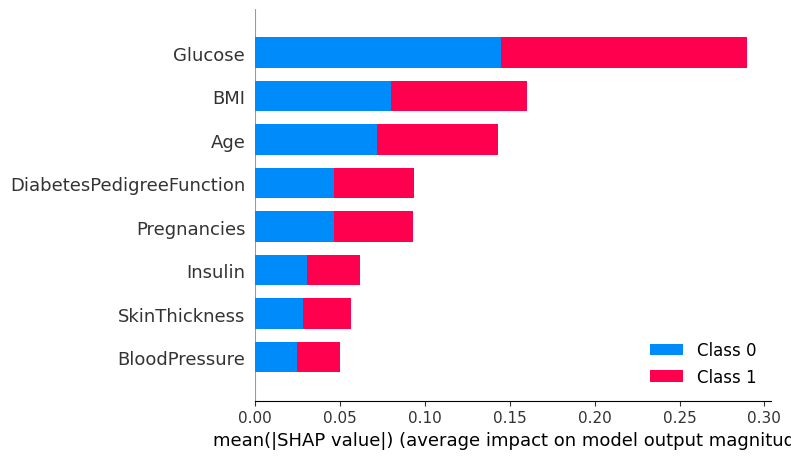

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a machine learning model (e.g., RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize a SHAP explainer
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

#shap.summary_plot(shap_values[1], X_test)


#shap.summary_plot(shap_values[1], X_test)

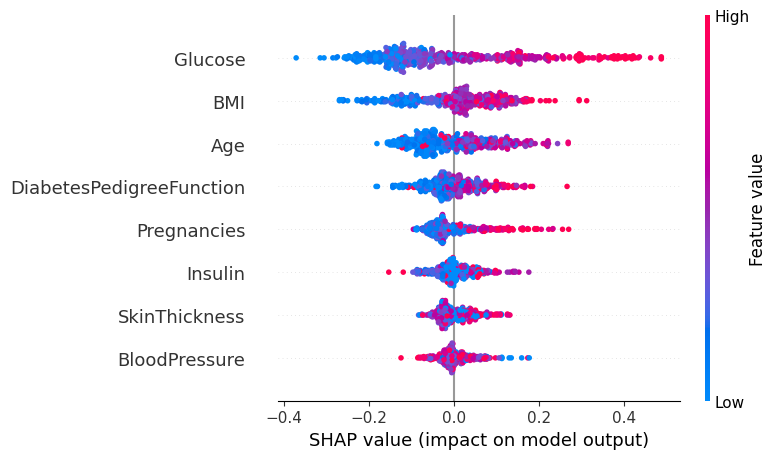

In [ ]:
shap.summary_plot(shap_values[1], X_test)